In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.ndimage as sim

(100, 401)

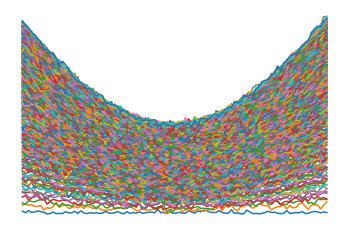

In [61]:
x = pd.read_csv('channeldata.csv')
x2 = (x>300)
plt.plot(x)
plt.axis('off')
ny,nx = x.shape
xx = np.linspace(0,40,nx)
yy = np.linspace(0,10,ny)
x.shape


Text(0.5, 1.0, 'Vertical Edges')

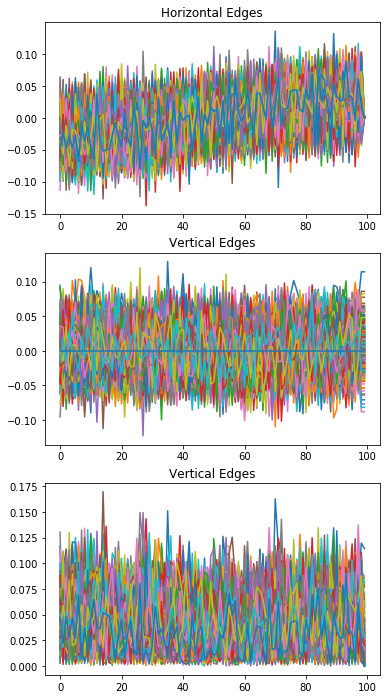

In [53]:
#This should hopefully detect the vertical and horizontal edges or a combination of both.
x = pd.read_csv('channeldata.csv')
x_copy = x.copy()
Dx= [[1,0],[-1,0]]
Dy= [[1,-1], [0,0]]

Gx = sim.convolve(x_copy,Dx)
Gy = sim.convolve(x_copy,Dy)
GG_totaledge = np.sqrt(Gx**2 + Gy**2)

plt.figure(figsize=(6,12))
plt.subplot(3,1,1)
plt.plot(Gx)
plt.title('Horizontal Edges')

# The vertical edges
plt.subplot(3,1,2)
plt.plot(Gy)
plt.title('Vertical Edges')



# All edges that were detected
plt.subplot(3,1,3)
plt.plot(GG_totaledge)
plt.title('All Edges')


